In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image 
import os
import random
import cv2

import tensorflow as tf
import keras 
from sklearn.model_selection import train_test_split 
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Flatten, BatchNormalization, GlobalAveragePooling2D, MaxPool2D

Predspracovanie

In [3]:
Ycat = []
Ybin = []
labels = ['Normal', 'Lung_Opacity','Viral_Pneumonia','Tuberculosis','COVID']
size = 256

def get_data(folder, Ycat, Ybin):
    x = 0
    data = []
    for label in labels: 
        path = os.path.join(folder, label)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(folder,label, images))[...,::-1]
            img = cv2.resize(img, (size, size))
            img = img.astype('float16')
            img /= 255
            data.append(img)
            Ycat.append(label)
            if label == 'COVID':
                Ybin.append(1)
            else:
                Ybin.append(0)
        x = x + 1
    return data

In [4]:
Xdata = get_data('',Ycat, Ybin)

In [5]:
#Xdata = Xdata.sample(n=len(Xdata), random_state=1242)
#Ycat = Ycat.sample(n=len(Ycat), random_state=1242)
random.seed(151)
Xdata = random.sample(Xdata,len(Xdata))#3600)
random.seed(151)
Ycat=random.sample(Ycat,len(Ycat))#3600)
random.seed(151)
Ybin=random.sample(Ybin,len(Ybin))#3600)
X = np.array(Xdata)
Ycat = np.array(Ycat)
Ybin = np.array(Ybin)#.astype('float16').reshape((-1,1))

In [ ]:
#Ycat = utils.to_categorical(labels,5)

Binary

In [6]:
xBin_train, xBin_test, yBin_train, yBin_test = train_test_split(X, Ybin, test_size=0.3, random_state=1)

In [7]:
model = Sequential()

model.add(Conv2D(16,3,padding="same", activation="relu", input_shape=(256,256,3)))

#model.add(Conv2D(16, 3, padding="same", activation="relu"))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,218,433
Trainable params: 134,218,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

In [8]:
from tensorflow.keras.optimizers import Adam

adam = Adam()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])

In [9]:
#checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1)
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')

In [10]:
history = model.fit(xBin_train, yBin_train, epochs=5, validation_data=(xBin_test, yBin_test),callbacks=[checkpoint])

Epoch 1/5
479/479 [==============================] - ETA: 0s - loss: 0.8536 - accuracy: 0.8648
Epoch 00001: val_loss improved from inf to 0.22074, saving model to model.h5
479/479 [==============================] - 651s 1s/step - loss: 0.8536 - accuracy: 0.8648 - val_loss: 0.2207 - val_accuracy: 0.9125
Epoch 2/5
479/479 [==============================] - ETA: 0s - loss: 0.1722 - accuracy: 0.9351
Epoch 00002: val_loss improved from 0.22074 to 0.19257, saving model to model.h5
479/479 [==============================] - 600s 1s/step - loss: 0.1722 - accuracy: 0.9351 - val_loss: 0.1926 - val_accuracy: 0.9244
Epoch 3/5
479/479 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.9464
Epoch 00003: val_loss improved from 0.19257 to 0.17452, saving model to model.h5
479/479 [==============================] - 606s 1s/step - loss: 0.1458 - accuracy: 0.9464 - val_loss: 0.1745 - val_accuracy: 0.9413
Epoch 4/5
479/479 [==============================] - ETA: 0s - loss: 0.0986 - ac

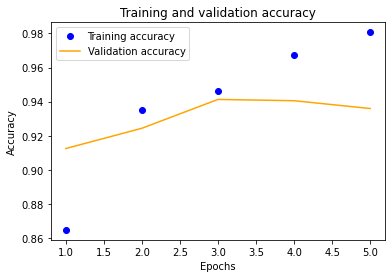

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(xBin_test)
#predictions = model.predict(xBin_test)
#predictions = predictions.reshape(1,-1)[0]

In [18]:
pred = [int(round(x[0])) for x in predictions]

In [27]:
print(yBin_test.shape)

(6560,)


In [19]:
print(classification_report(yBin_test, pred, target_names = ['Non-COVID (Class 0)','COVID (Class 1)']))

                     precision    recall  f1-score   support

Non-COVID (Class 0)       0.94      0.99      0.96      5449
    COVID (Class 1)       0.92      0.68      0.78      1111

           accuracy                           0.94      6560
          macro avg       0.93      0.83      0.87      6560
       weighted avg       0.94      0.94      0.93      6560



In [20]:
print('Confusion matrix : \n')
print(confusion_matrix(yBin_test, pred)) #(actual, predicted)

Confusion matrix : 

[[5383   66]
 [ 354  757]]


Categorical

In [ ]:
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2))),

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

model.summary()

In [ ]:
adam = Adam()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
f = model.fit(x_train, y_train, epochs = 3,batch_size=128, validation_data=(x_test, y_test))

In [ ]:
acc = f.history['accuracy']
val_acc = f.history['val_accuracy']
loss = f.history['loss']
val_loss = f.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print(x_test.shape,y_test.shape)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predicted = np.argmax(predictions, axis = 1)

In [ ]:
predicted

In [ ]:
results={
   0:'Normal',
   1:'Lung_Opacity',
   2:'Viral_Pneumonia',
   3:'Tuberculosis',
   4:'COVID',
}

In [ ]:
#print(pd.crosstab(y_test, predicted))
print(pd.crosstab(y_test, predicted))

In [ ]:
print(classification_report(y_test, predicted))#,labels = labels, target_names = ['Normal', 'Lung_Opacity','Viral_Pneumonia','Tuberculosis','COVID']))